<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [107]:
# Total ../data/0&1/
url = '../../data/BtoA&D/total_text_wend.csv'
total_text_week = pd.read_csv(url)

In [108]:
X_t = total_text_week.copy()
del X_t['tran_week']
del X_t['text_wend']

y_t = total_text_week['text_wend']
y_t.value_counts() 

1    2248
2    1148
3    1024
0     394
Name: text_wend, dtype: int64

In [109]:
entire_random_guess_value = 2248 / 4814

In [110]:
print(X_t)
print(y_t)

      tran_wend
0             0
1             0
2             0
3             1
4             0
...         ...
4809          0
4810          0
4811          0
4812          1
4813          0

[4814 rows x 1 columns]
0       1
1       0
2       1
3       1
4       0
       ..
4809    2
4810    1
4811    1
4812    2
4813    2
Name: text_wend, Length: 4814, dtype: int64


In [111]:
# Sampled

In [112]:
url = '../../data/BtoA&D/sample_text_wend.csv'
sampled_text_week = pd.read_csv(url)

X_s = sampled_text_week.copy()
del X_s['tran_week']
del X_s['text_wend']


y_s = sampled_text_week['text_wend']
y_s.value_counts() 

0    394
1    394
2    394
3    394
Name: text_wend, dtype: int64

In [113]:
sample_random_guess = 1 / 4

In [114]:
print(X_s)
print(y_s)

      tran_wend
0             0
1             0
2             1
3             0
4             1
...         ...
1571          1
1572          0
1573          1
1574          0
1575          0

[1576 rows x 1 columns]
0       0
1       2
2       3
3       1
4       1
       ..
1571    3
1572    1
1573    2
1574    3
1575    1
Name: text_wend, Length: 1576, dtype: int64


## SVM

## Seed == 100

In [115]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [116]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


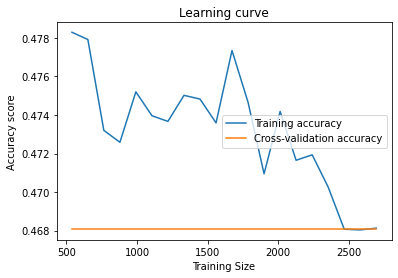

In [117]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [118]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [119]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


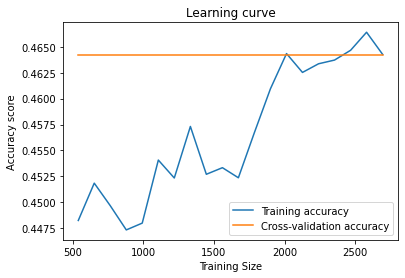

In [120]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [121]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [122]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


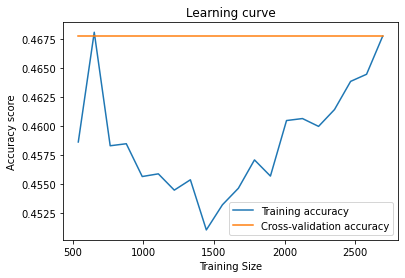

In [123]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [124]:
# learning curve considering different seeds 

In [125]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

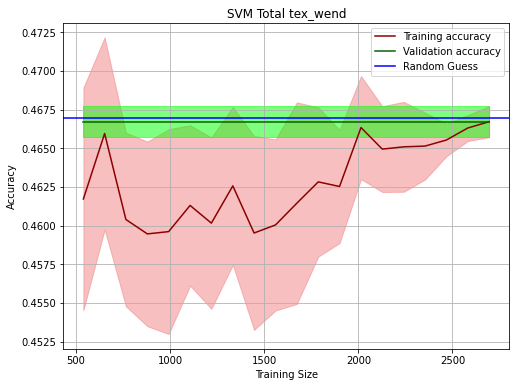

In [126]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Total tex_wend')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like SVM cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## Logistic Regression

## Seed 100

In [127]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [128]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


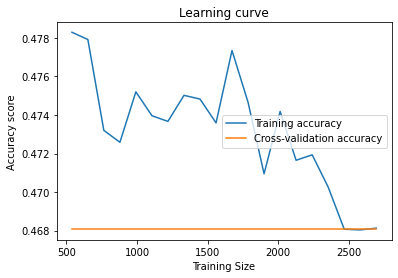

In [129]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [130]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [131]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


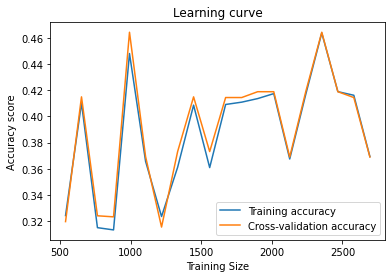

In [132]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='saga')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [133]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [134]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


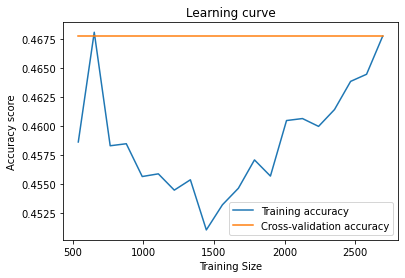

In [135]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [136]:
# learning curve considering different seeds 

In [137]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

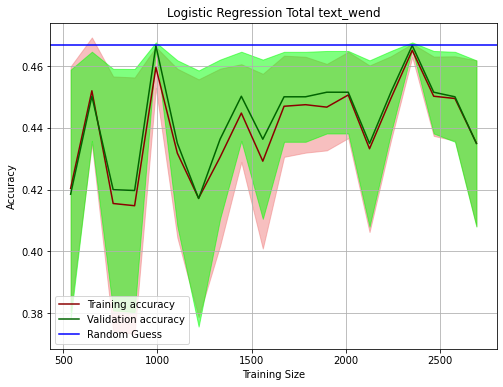

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Total text_wend')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like LR cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## KNN

## Seed 100

In [139]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [140]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


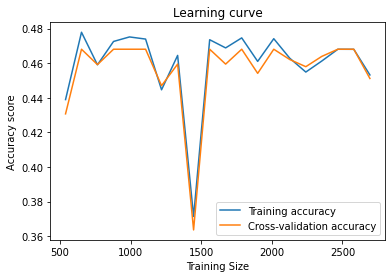

In [141]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=23)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [142]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [143]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


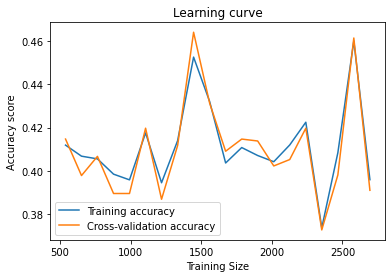

In [144]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='uniform', n_neighbors=12)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [145]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [146]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


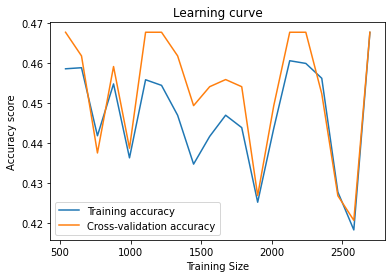

In [147]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=34)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [148]:
# learning curve considering different seeds 

In [149]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

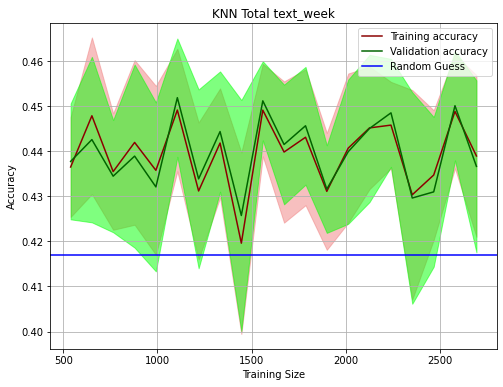

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Total text_week')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like KNN cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## Random Forest

## Seed 100

In [151]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [152]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


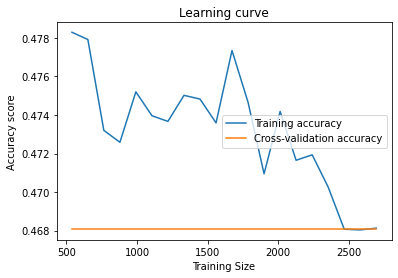

In [153]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [154]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [155]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


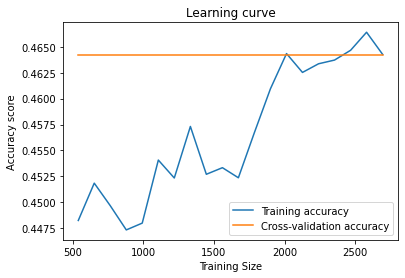

In [156]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [157]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [158]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 539  652  765  879  992 1106 1219 1333 1446 1560 1673 1787 1900 2014
 2127 2241 2354 2468 2581 2695]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


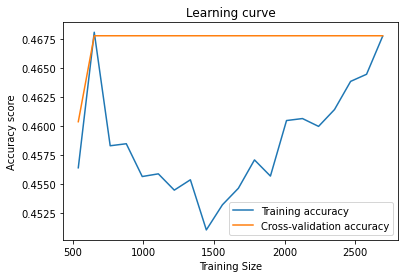

In [159]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [160]:
# learning curve considering different seeds 

In [161]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

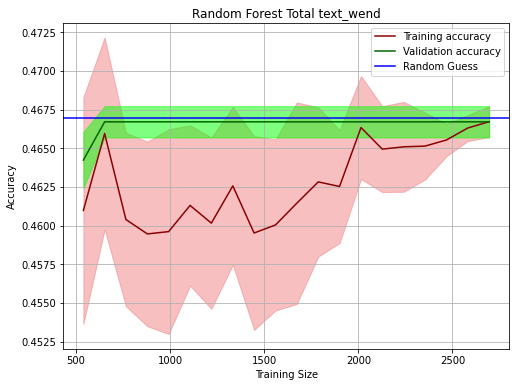

In [162]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Total text_wend')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like LR cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they highly fluctuate.

# 2. sampled

# SVM 

## Seed 100

In [163]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [164]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


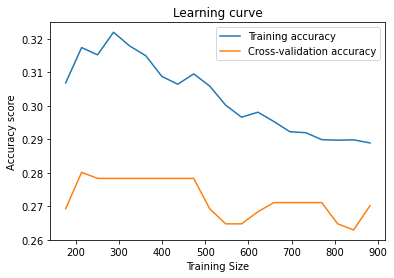

In [165]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=1.0, gamma=0.0001)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [166]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [167]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


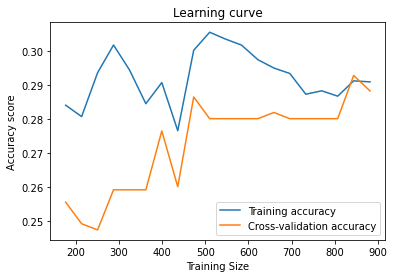

In [168]:
plot_model = svm.SVC(kernel='linear', C=0.1, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [169]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [170]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


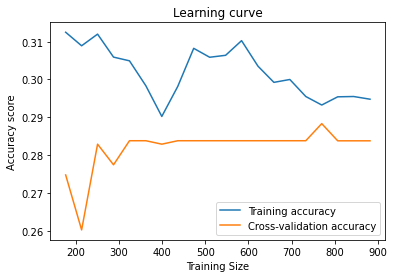

In [171]:
plot_model = svm.SVC(kernel='linear', C=1.0, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [172]:
# learning curve considering different seeds 

In [173]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

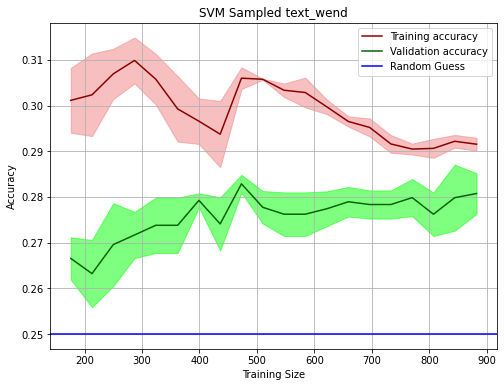

In [174]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# Logistic Regression

## Seed 100

In [175]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [176]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


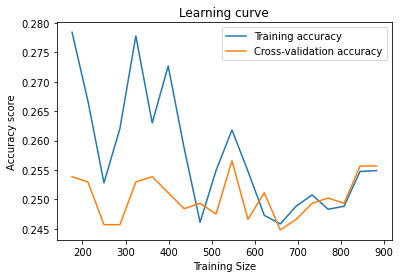

In [177]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [178]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [179]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


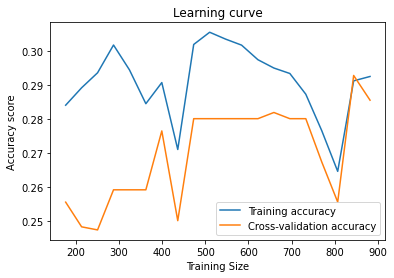

In [180]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [181]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [182]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


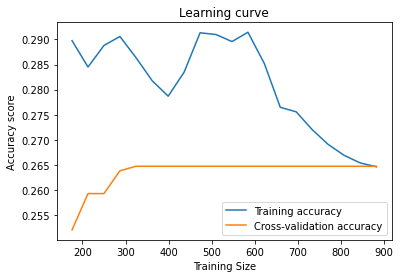

In [183]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [184]:
# learning curve considering different seeds 

In [185]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

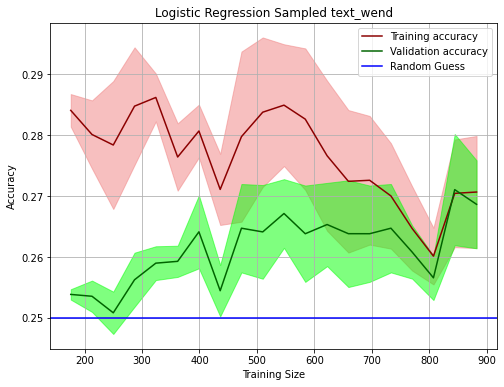

In [186]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# KNN

## Seed 100

In [187]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [188]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


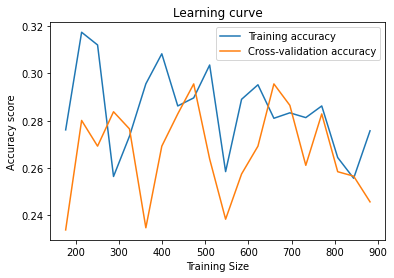

In [189]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=28)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [190]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [191]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


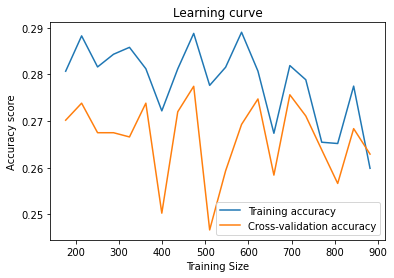

In [192]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform', n_neighbors=34)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [193]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [194]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


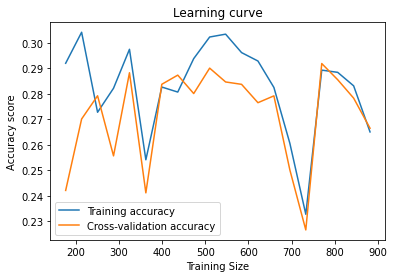

In [195]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=50)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [196]:
# learning curve considering different seeds

In [197]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

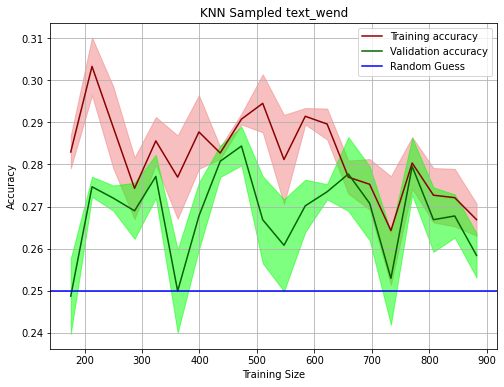

In [198]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is constant throughout all training sizes. It seems like they the algorithm does not learn anything.

# Random Forest

## Seed 100

In [199]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [200]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


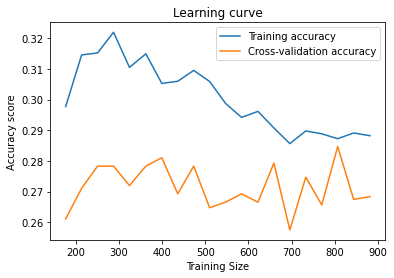

In [201]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='log2', min_samples_leaf=38, min_samples_split=50, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [202]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [203]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


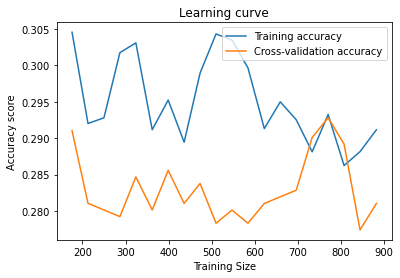

In [204]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [205]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [206]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [176 213 250 287 324 362 399 436 473 510 547 584 622 659 696 733 770 807
 844 882]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


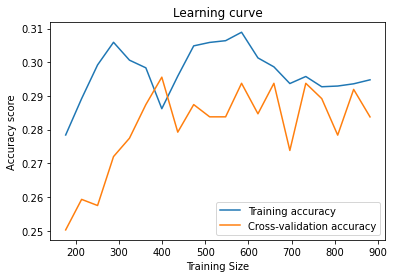

In [207]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=38, max_features='sqrt', min_samples_leaf=50, min_samples_split=50, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [208]:
# learning curve considering different seeds

In [209]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

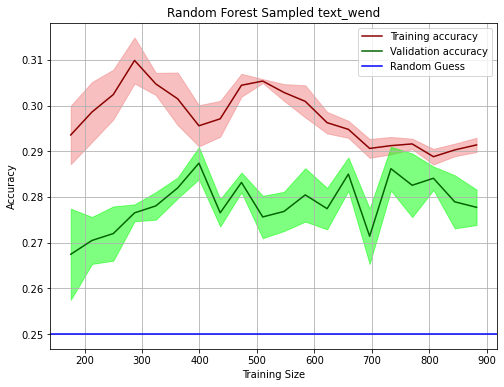

In [210]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is relatively constant throughout all training sizes. It seems like they the algorithm does not learn anything. It is obvious that machine learning models cannot predict the level depression and anxiety.